Original Image:


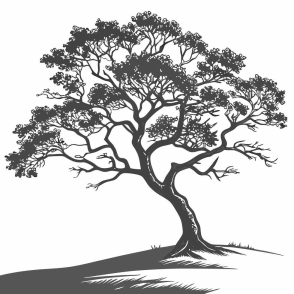

Image with 8 intensity levels:


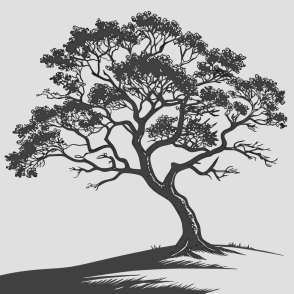

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def reduce_intensity_levels(image, levels):
  if levels not in [2, 4, 8, 16, 32, 64, 128, 256]:
    print("Error: Desired number of intensity levels must be an integer power of 2 between 2 and 256.")
    return None

  scaling_factor = 256 / levels
  reduced_image = np.floor(image / scaling_factor) * scaling_factor
  reduced_image = reduced_image.astype(np.uint8)

  return reduced_image

def resize_image(image, scale_percent):
  """Resizes image by scale_percent (e.g., 50 means half the size)."""
  width = int(image.shape[1] * scale_percent / 100)
  height = int(image.shape[0] * scale_percent / 100)
  return cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)

# Read the grayscale image
try:
  img = cv2.imread('gray_scale_tree_Image.jpg', cv2.IMREAD_GRAYSCALE)

  if img is None:
    print("Error: Could not read the image. Make sure 'gray_scale_tree_Image.jpg' exists.")
  else:
    # Resize for better display (e.g., 30% of original size)
    img_small = resize_image(img, scale_percent=30)

    print("Original Image:")
    cv2_imshow(img_small)

    # Reduce intensity levels
    desired_levels = 8
    img_reduced = reduce_intensity_levels(img, desired_levels)

    if img_reduced is not None:
      # Resize reduced image as well
      img_reduced_small = resize_image(img_reduced, scale_percent=30)

      print(f"Image with {desired_levels} intensity levels:")
      cv2_imshow(img_reduced_small)

except Exception as e:
  print(f"An error occurred: {e}")


Image after 3x3 average filter:


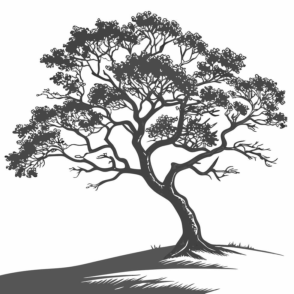

Image after 10x10 average filter:


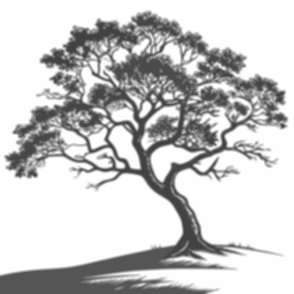

Image after 20x20 average filter:


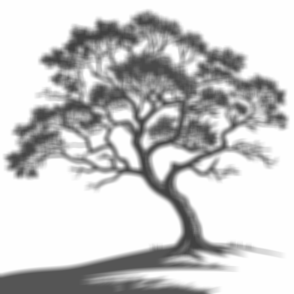

In [6]:
# Function to apply average filter
def apply_average_filter(image, kernel_size):

  # Create the kernel
  kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
  # Apply the filter
  filtered_image = cv2.filter2D(image, -1, kernel)
  return filtered_image

if img is not None:
  # Apply 3x3 average filter
  img_filtered_3x3 = apply_average_filter(img, 3)
  img_filtered_3x3_small = resize_image(img_filtered_3x3, scale_percent=30)
  print("Image after 3x3 average filter:")
  cv2_imshow(img_filtered_3x3_small)

  # Apply 10x10 average filter
  img_filtered_10x10 = apply_average_filter(img, 10)
  img_filtered_10x10_small = resize_image(img_filtered_10x10, scale_percent=30)
  print("Image after 10x10 average filter:")
  cv2_imshow(img_filtered_10x10_small)

  # Apply 20x20 average filter
  img_filtered_20x20 = apply_average_filter(img, 20)
  img_filtered_20x20_small = resize_image(img_filtered_20x20, scale_percent=30)
  print("Image after 20x20 average filter:")
  cv2_imshow(img_filtered_20x20_small)

Image rotated by 45 degrees


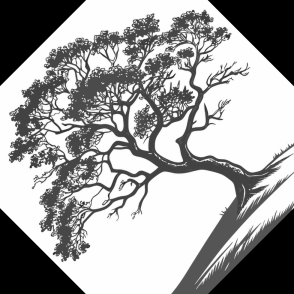

Image rotated by 90 degrees


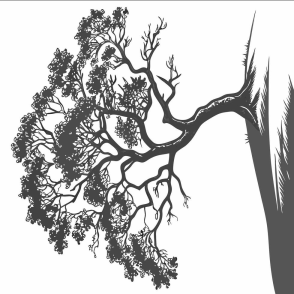

In [7]:
# Function to rotate an image
def rotate_image(image, angle):
  # Get the dimensions of the image
  height, width = image.shape[:2]
  # Calculate the rotation matrix
  rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
  # Perform the rotation
  rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
  return rotated_image

if img is not None:
  # Rotate by 45 degrees
  img_rotated_45 = rotate_image(img, 45)
  img_rotated_45_small = resize_image(img_rotated_45, scale_percent=30)
  print("Image rotated by 45 degrees")
  cv2_imshow(img_rotated_45_small)

  # Rotate by 90 degrees
  img_rotated_90 = rotate_image(img, 90)
  img_rotated_90_small = resize_image(img_rotated_90, scale_percent=30)
  print("Image rotated by 90 degrees")
  cv2_imshow(img_rotated_90_small)


Image after 3x3 spatial averaging


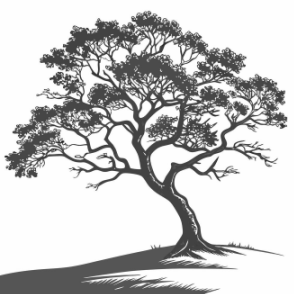

Image after 5x5 spatial averaging


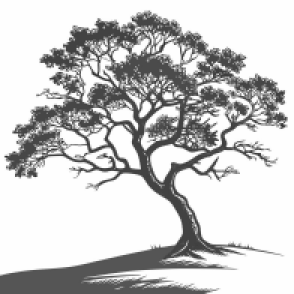

Image after 7x7 spatial averaging


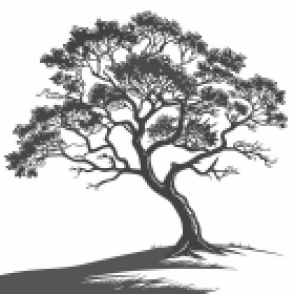

In [8]:
# Function to apply spatial averaging
def apply_spatial_averaging(image, block_size):
  height, width = image.shape
  averaged_image = np.zeros_like(image, dtype=np.float32)

  for r in range(0, height, block_size):
    for c in range(0, width, block_size):
      # Define the block boundaries
      r_end = min(r + block_size, height)
      c_end = min(c + block_size, width)

      # Extract the block
      block = image[r:r_end, c:c_end]

      # Calculate the average of the block
      if block.size > 0: # Handle cases where block might be empty at edges
          average_value = np.mean(block)

          # Replace the block with the average value
          averaged_image[r:r_end, c:c_end] = average_value

  return averaged_image.astype(np.uint8)

if img is not None:
  # Apply 3x3 spatial averaging
  img_spatial_avg_3x3 = apply_spatial_averaging(img, 3)
  img_spatial_avg_3x3_small = resize_image(img_spatial_avg_3x3, scale_percent=30)
  print("Image after 3x3 spatial averaging")
  cv2_imshow(img_spatial_avg_3x3_small)

  # Apply 5x5 spatial averaging
  img_spatial_avg_5x5 = apply_spatial_averaging(img, 5)
  img_spatial_avg_5x5_small = resize_image(img_spatial_avg_5x5, scale_percent=30)
  print("Image after 5x5 spatial averaging")
  cv2_imshow(img_spatial_avg_5x5_small)

  # Apply 7x7 spatial averaging
  img_spatial_avg_7x7 = apply_spatial_averaging(img, 7)
  img_spatial_avg_7x7_small = resize_image(img_spatial_avg_7x7, scale_percent=30)
  print("Image after 7x7 spatial averaging")
  cv2_imshow(img_spatial_avg_7x7_small)